In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install openpyxl

In [4]:
df = pd.read_excel("customer_retention_dataset.xlsx")
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [5]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

Pre-processing the columns names

In [47]:
from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [48]:
df

Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
5                 Female         31-40 years   
6                   Male         41-50 yaers   
7                   Male         41-50 yaers   
8                 Female  Less than 20 years   
9                 Female         31-40 years   
10                  Male         31-40 years   
11                Female         41-50 yaers   
12                Female  51 years and above   
13                Female         31-40 years   
14                Female         21-30 years   
15                Female         21-30 years   
16                  Male         31-40 years   
17                  Male         41-50 yaers   
18                Female         41-50 yaers   
19                Female         21-30 years   
20                Female         21-30 years   
21                  Male         31-40 years   
22                  Male         41-50 yaers   
23                Female         41-50 yaers   
24                Female         21-30 years   
25                Female         21-30 years   
26                  Male         21-30 years   
27                  Male         31-40 years   
28                Female         41-50 yaers   
29                Female         41-50 yaers   
30                Female  Less than 20 years   
31                  Male         31-40 years   
32                  Male         31-40 years   
33                Female         41-50 yaers   
34                Female  51 years and above   
35                Female         21-30 years   
36                  Male         31-40 years   
37                  Male         41-50 yaers   
38                Female         41-50 yaers   
39                Female         21-30 years   
40                Female         21-30 years   
41                  Male         31-40 years   
42                  Male         21-30 years   
43                Female         21-30 years   
44                Female         31-40 years   
45                Female         41-50 yaers   
46                  Male         41-50 yaers   
47                  Male  Less than 20 years   
48                Female         31-40 years   
49                Female         31-40 years   
50                Female         41-50 yaers   
51                  Male  51 years and above   
52                  Male         41-50 yaers   
53                Female         41-50 yaers   
54                Female         21-30 years   
55                Female         21-30 years   
56                  Male         21-30 years   
57                  Male         21-30 years   
58                Female         31-40 years   
59                Female         41-50 yaers   
60                Female         41-50 yaers   
61                  Male  Less than 20 years   
62                  Male         31-40 years   
63                Female         31-40 years   
64                Female         41-50 yaers   
65                Female  51 years and above   
66                  Male         31-40 years   
67                  Male         41-50 yaers   
68                Female         41-50 yaers   
69                Female         21-30 years   
70                Female         21-30 years   
71                  Male         31-40 years   
72                  Male         21-30 years   
73                Female         21-30 years   
74                Female         31-40 years   
75                Female         41-50 yaers   
76                  Male         41-50 yaers   
77                  Male  Less than 20 years   
78                Female         31-40 years   
79                Female         31-40 years   
80                Female         41-50 yaers   
81                  Male  51 years and above   
82                  

In [7]:
df.head()

Gender of respondent How old are you? Which city do you shop online from?  \
0                 Male      31-40 years                               Delhi   
1               Female      21-30 years                               Delhi   
2               Female      21-30 years                       Greater Noida   
3                 Male      21-30 years                             Karnal    
4               Female      21-30 years                          Bangalore    

   What is the Pin Code of where you shop online from?  \
0                                             110009     
1                                             110030     
2                                             201308     
3                                             132001     
4                                             530068     

  Since How Long You are Shopping Online ?  \
0                            Above 4 years   
1                            Above 4 years   
2                                3-4 years   
3                                3-4 years   
4                                2-3 years   

  How many times you have made an online purchase in the past  year?  \
0                                        31-40 times                   
1                                 41 times and above                   
2                                 41 times and above                   
3                                 Less than 10 times                   
4                                        11-20 times                   

  How do you access the internet while shopping on-line?  \
0                                            Dial-up       
1                                              Wi-Fi       
2                                    Mobile Internet       
3                                    Mobile Internet       
4                                              Wi-Fi       

  Which device do you use to access the online shopping?  \
0                                            Desktop       
1                                         Smartphone       
2                                         Smartphone       
3                                         Smartphone       
4                                         Smartphone       

  What is the screen size of your mobile device?  \
0                                         Others   
1                                     4.7 inches   
2                                     5.5 inches   
3                                     5.5 inches   
4                                     4.7 inches   

  What is the operating system (OS) of your device?  \
0                             Window/windows Mobile   
1                                           IOS/Mac   
2                                           Android   
3                                           IOS/Mac   
4                                           IOS/Mac   

  What browser do you run on your device to access the website?  \
0                                      Google chrome              
1                                      Google chrome              
2                                      Google chrome              
3                                             Safari              
4                                             Safari              

  Which channel did you follow to arrive at your favorite online store for the first time?  \
0                                      Search Engine                                         
1                                      Search Engine                                         
2                                      Search Engine                                         
3                                      Search Engine                                         
4                                  Content Marketing                                         

  After first visit, how do you reach the online retail store?  \
0                                      Search Engine             
1 

In [8]:
df.shape

(269, 71)

In [9]:
df.dtypes

Gender of respondent                                                                                         object
How old are you?                                                                                             object
Which city do you shop online from?                                                                          object
What is the Pin Code of where you shop online from?                                                           int64
Since How Long You are Shopping Online ?                                                                     object
How many times you have made an online purchase in the past  year?                                           object
How do you access the internet while shopping on-line?                                                       object
Which device do you use to access the online shopping?                                                       object
What is the screen size of your mobile device?                          

All the columns are of object datatype except for pincode column which is of int type

In [10]:
df.isnull().sum().any()

False

There are no null values is the dataset

In [11]:
df.nunique()

Gender of respondent                                                                                          2
How old are you?                                                                                              5
Which city do you shop online from?                                                                          11
What is the Pin Code of where you shop online from?                                                          39
Since How Long You are Shopping Online ?                                                                      5
How many times you have made an online purchase in the past  year?                                            6
How do you access the internet while shopping on-line?                                                        4
Which device do you use to access the online shopping?                                                        4
What is the screen size of your mobile device?                                                          

All the columns are of categorical types. There are no identifier or constant columns

# Univariate Analysis

In [12]:
personal_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']

Personal Info

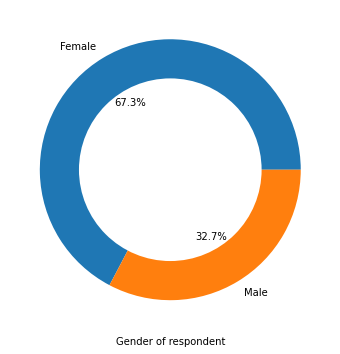

<Figure size 432x288 with 0 Axes>

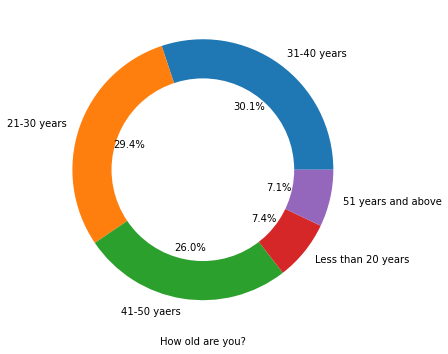

<Figure size 432x288 with 0 Axes>

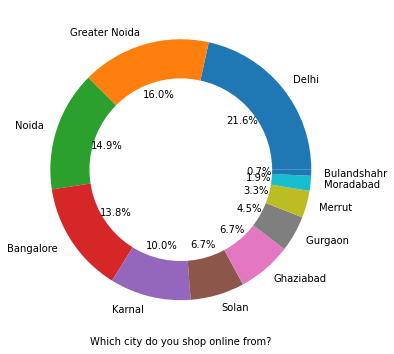

<Figure size 432x288 with 0 Axes>

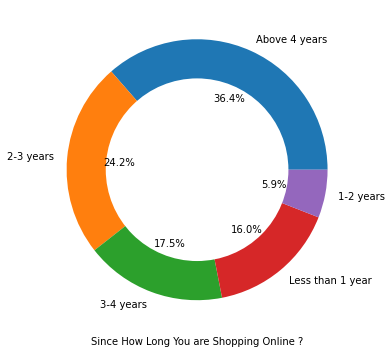

<Figure size 432x288 with 0 Axes>

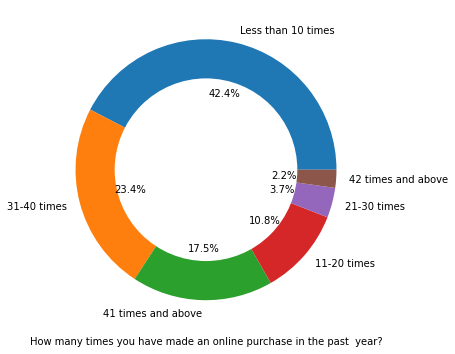

<Figure size 432x288 with 0 Axes>

In [13]:
for i in personal_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

-There is double the number of women than men who have taken this survey. -Most of the people are in their 30's followed by 20's, teenagers and senior citizen are the least in number. -Most of the people belong from delhi, noida and banglore, ambiguity can also be seen as noida has two categories (noida and grater noida) which need to be handled -Most of the people shopping online have been shopping from a long time. -Majority of people shop online 10 times a year, amiguity can also be seen for range 42 times and above which needs to be handled

Analysis on the basis of Various following factors

Intention of Repeat purchase:

In [14]:
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',
                                                                                inplace=True)

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

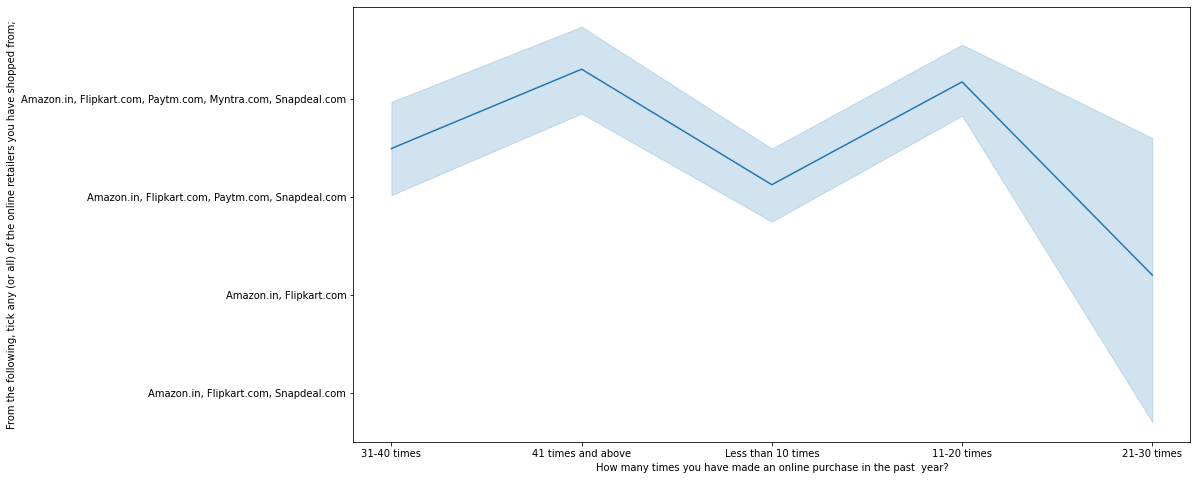

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

Heavy shoppers who shop more than 41 times a year shop from all the online brands, some of the people who shop for 32-40 and less than 10 times a year seem to exclude myntra. People shop from Amazon and flipkart whatever be the case.

Converting years to numbers for better analysis

In [16]:
dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
df['Average times made an online purchase']=df['How many times you have made an online purchase in the past  year?'].replace(dict)

In [17]:
df

Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
5                 Female         31-40 years   
6                   Male         41-50 yaers   
7                   Male         41-50 yaers   
8                 Female  Less than 20 years   
9                 Female         31-40 years   
10                  Male         31-40 years   
11                Female         41-50 yaers   
12                Female  51 years and above   
13                Female         31-40 years   
14                Female         21-30 years   
15                Female         21-30 years   
16                  Male         31-40 years   
17                  Male         41-50 yaers   
18                Female         41-50 yaers   
19                Female         21-30 years   
20                Female         21-30 years   
21                  Male         31-40 years   
22                  Male         41-50 yaers   
23                Female         41-50 yaers   
24                Female         21-30 years   
25                Female         21-30 years   
26                  Male         21-30 years   
27                  Male         31-40 years   
28                Female         41-50 yaers   
29                Female         41-50 yaers   
30                Female  Less than 20 years   
31                  Male         31-40 years   
32                  Male         31-40 years   
33                Female         41-50 yaers   
34                Female  51 years and above   
35                Female         21-30 years   
36                  Male         31-40 years   
37                  Male         41-50 yaers   
38                Female         41-50 yaers   
39                Female         21-30 years   
40                Female         21-30 years   
41                  Male         31-40 years   
42                  Male         21-30 years   
43                Female         21-30 years   
44                Female         31-40 years   
45                Female         41-50 yaers   
46                  Male         41-50 yaers   
47                  Male  Less than 20 years   
48                Female         31-40 years   
49                Female         31-40 years   
50                Female         41-50 yaers   
51                  Male  51 years and above   
52                  Male         41-50 yaers   
53                Female         41-50 yaers   
54                Female         21-30 years   
55                Female         21-30 years   
56                  Male         21-30 years   
57                  Male         21-30 years   
58                Female         31-40 years   
59                Female         41-50 yaers   
60                Female         41-50 yaers   
61                  Male  Less than 20 years   
62                  Male         31-40 years   
63                Female         31-40 years   
64                Female         41-50 yaers   
65                Female  51 years and above   
66                  Male         31-40 years   
67                  Male         41-50 yaers   
68                Female         41-50 yaers   
69                Female         21-30 years   
70                Female         21-30 years   
71                  Male         31-40 years   
72                  Male         21-30 years   
73                Female         21-30 years   
74                Female         31-40 years   
75                Female         41-50 yaers   
76                  Male         41-50 yaers   
77                  Male  Less than 20 years   
78                Female         31-40 years   
79                Female         31-40 years   
80                Female         41-50 yaers   
81                  Male  51 years and above   
82                  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

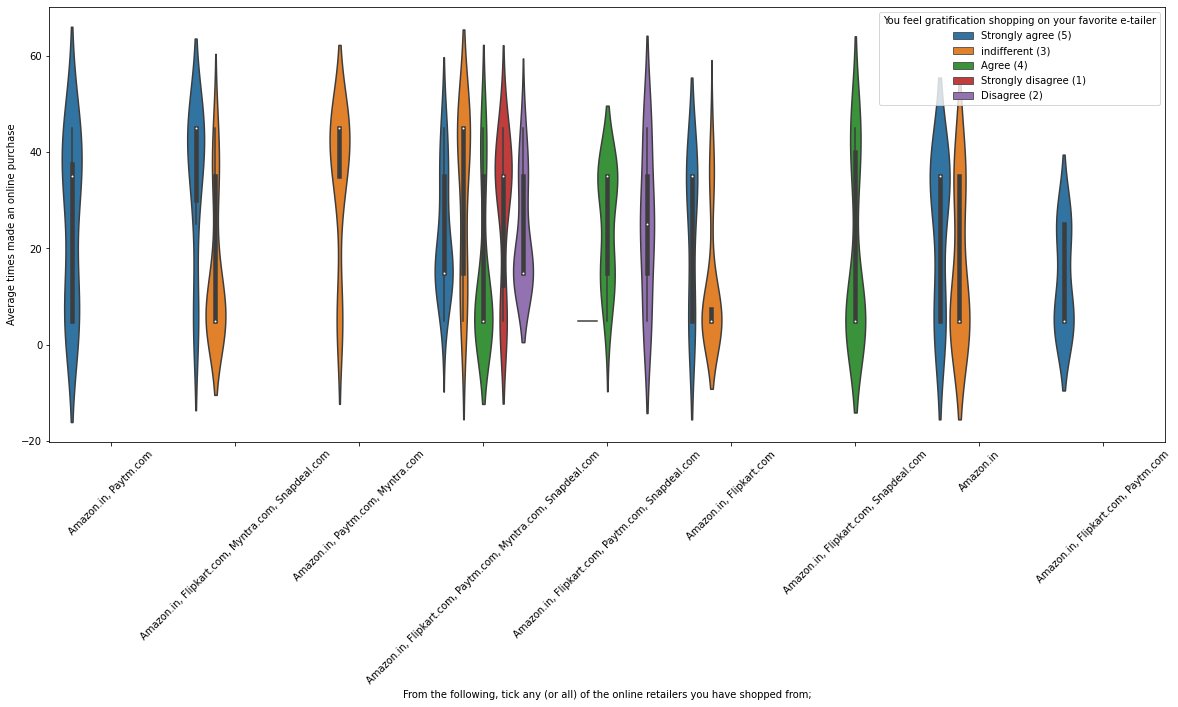

In [18]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation=45)

Almost all the people who have shopped from amazon, flipkart and paytm are satisfied. People who shop from a more number of online brands dosent seem to be satisfied.

Online Retailing:

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

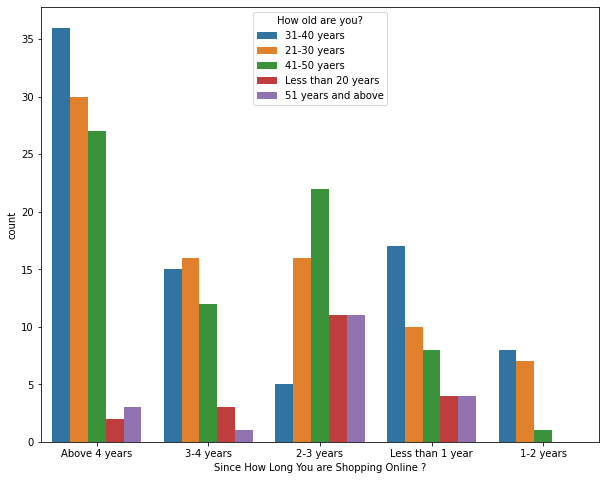

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

Highest number of people have been shopping online for above 4 years except for the age group below 20 years and above 50 years. People who are shopping online for 1-2 years does not include teenagers and elder people.

Converting Years to numbers for better analysis

In [20]:
df['Since How Long You are Shopping Online ?'].unique()

array(['Above 4 years', '3-4 years', '2-3 years', 'Less than 1 year',
       '1-2 years'], dtype=object)

In [21]:
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['Since How Long You are Shopping Online ?'].replace(dict)

In [22]:
df

Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
5                 Female         31-40 years   
6                   Male         41-50 yaers   
7                   Male         41-50 yaers   
8                 Female  Less than 20 years   
9                 Female         31-40 years   
10                  Male         31-40 years   
11                Female         41-50 yaers   
12                Female  51 years and above   
13                Female         31-40 years   
14                Female         21-30 years   
15                Female         21-30 years   
16                  Male         31-40 years   
17                  Male         41-50 yaers   
18                Female         41-50 yaers   
19                Female         21-30 years   
20                Female         21-30 years   
21                  Male         31-40 years   
22                  Male         41-50 yaers   
23                Female         41-50 yaers   
24                Female         21-30 years   
25                Female         21-30 years   
26                  Male         21-30 years   
27                  Male         31-40 years   
28                Female         41-50 yaers   
29                Female         41-50 yaers   
30                Female  Less than 20 years   
31                  Male         31-40 years   
32                  Male         31-40 years   
33                Female         41-50 yaers   
34                Female  51 years and above   
35                Female         21-30 years   
36                  Male         31-40 years   
37                  Male         41-50 yaers   
38                Female         41-50 yaers   
39                Female         21-30 years   
40                Female         21-30 years   
41                  Male         31-40 years   
42                  Male         21-30 years   
43                Female         21-30 years   
44                Female         31-40 years   
45                Female         41-50 yaers   
46                  Male         41-50 yaers   
47                  Male  Less than 20 years   
48                Female         31-40 years   
49                Female         31-40 years   
50                Female         41-50 yaers   
51                  Male  51 years and above   
52                  Male         41-50 yaers   
53                Female         41-50 yaers   
54                Female         21-30 years   
55                Female         21-30 years   
56                  Male         21-30 years   
57                  Male         21-30 years   
58                Female         31-40 years   
59                Female         41-50 yaers   
60                Female         41-50 yaers   
61                  Male  Less than 20 years   
62                  Male         31-40 years   
63                Female         31-40 years   
64                Female         41-50 yaers   
65                Female  51 years and above   
66                  Male         31-40 years   
67                  Male         41-50 yaers   
68                Female         41-50 yaers   
69                Female         21-30 years   
70                Female         21-30 years   
71                  Male         31-40 years   
72                  Male         21-30 years   
73                Female         21-30 years   
74                Female         31-40 years   
75                Female         41-50 yaers   
76                  Male         41-50 yaers   
77                  Male  Less than 20 years   
78                Female         31-40 years   
79                Female         31-40 years   
80                Female         41-50 yaers   
81                  Male  51 years and above   
82                  

In [23]:
df['Which city do you shop online from?'].unique()

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

In [24]:
#Changing Greater noida to noida
df['Which city do you shop online from?'].replace({'Greater Noida':'Noida'},inplace=True)

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Average years of shopping online'>

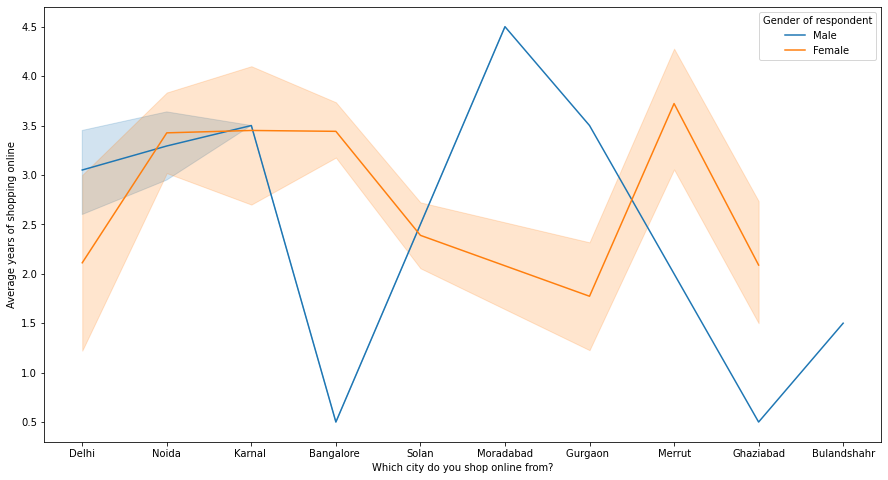

In [25]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Which city do you shop online from?'],df['Average years of shopping online'],hue=df['Gender of respondent'])

In lines, we can see that density of female customers is more than male. Men living in banglore and ghaziabad shop have shopped online for less than 1 year. Highest number of men shopping online belong from delhi and noida, while men from moradabad have been shopping online for the longest. Women from meerut and noida have shopped the longest.

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

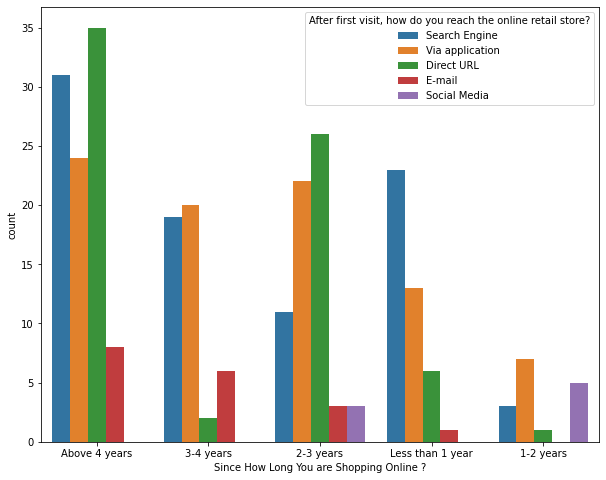

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['After first visit, how do you reach the online retail store?'])

Even though people who are shopping online for more than 3 years donot use the application rather use search engine and direct url's in large number which indicates that online brands should update all their platforms rather than just application.

Brand image

In [27]:
performance=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

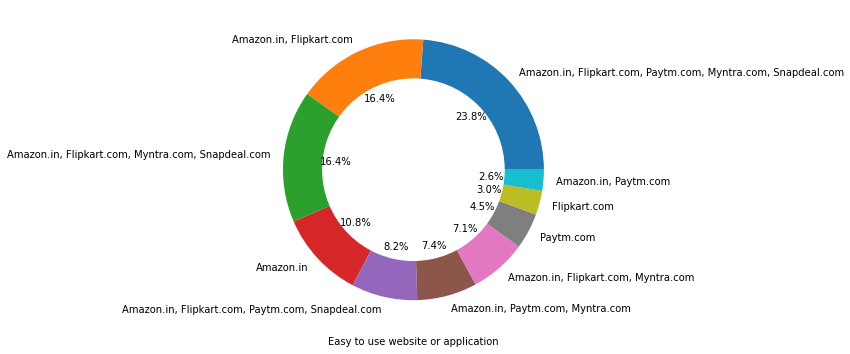

<Figure size 432x288 with 0 Axes>

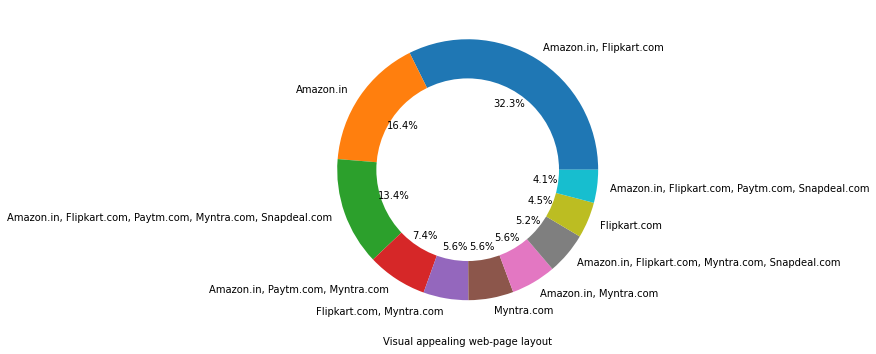

<Figure size 432x288 with 0 Axes>

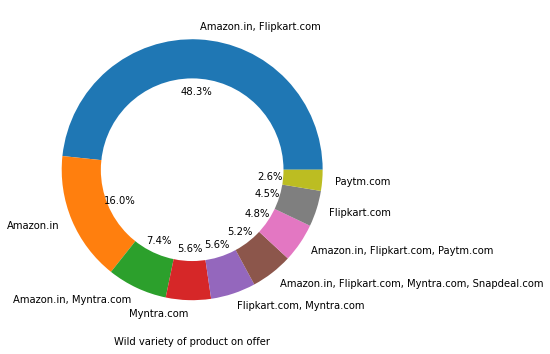

<Figure size 432x288 with 0 Axes>

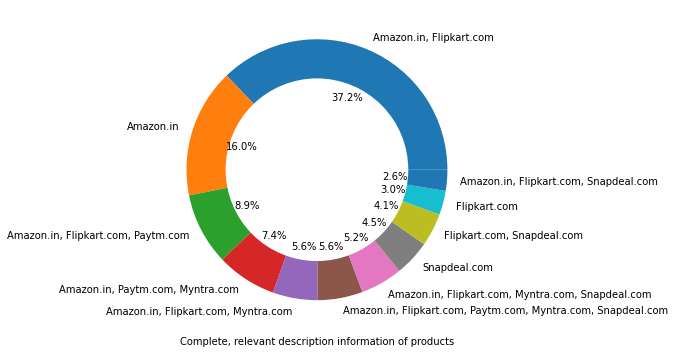

<Figure size 432x288 with 0 Axes>

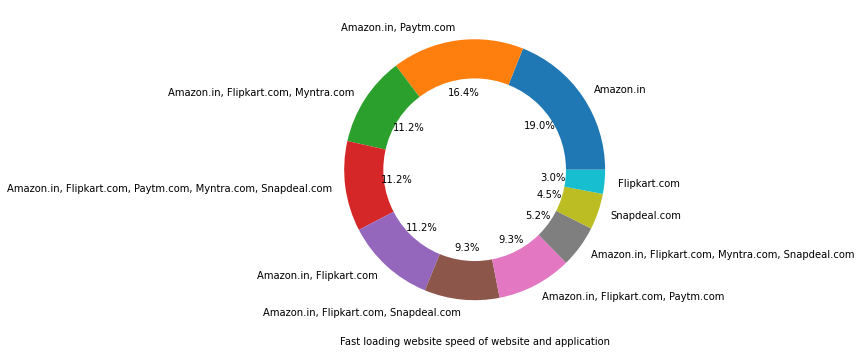

<Figure size 432x288 with 0 Axes>

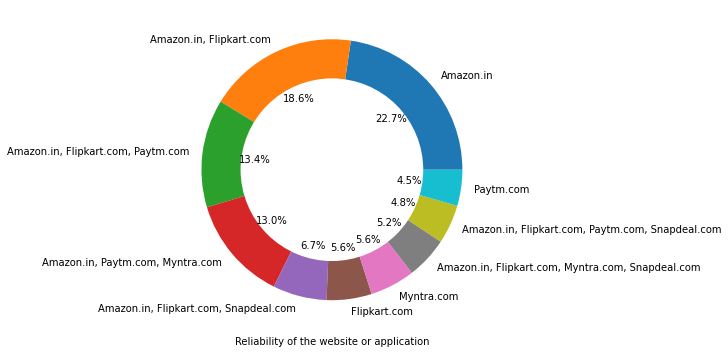

<Figure size 432x288 with 0 Axes>

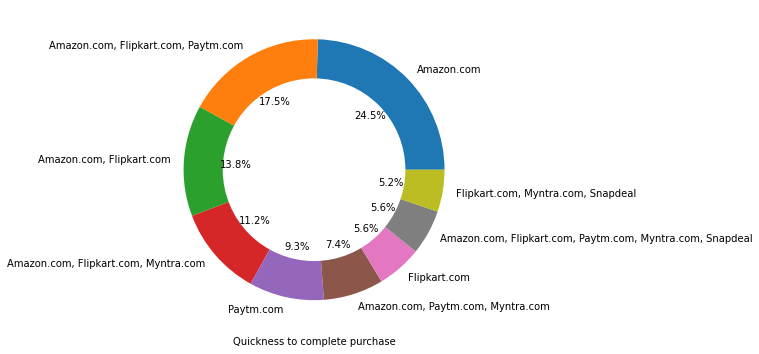

<Figure size 432x288 with 0 Axes>

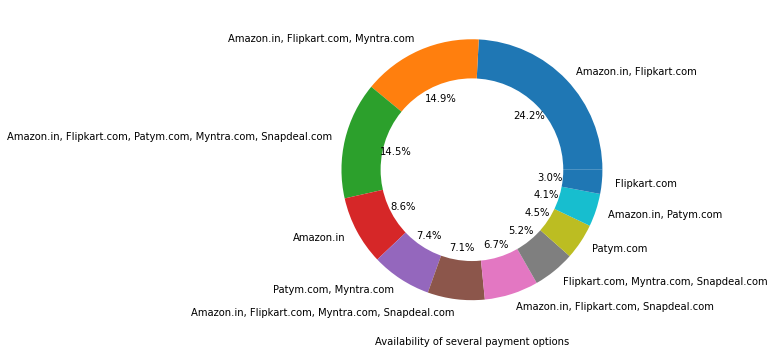

<Figure size 432x288 with 0 Axes>

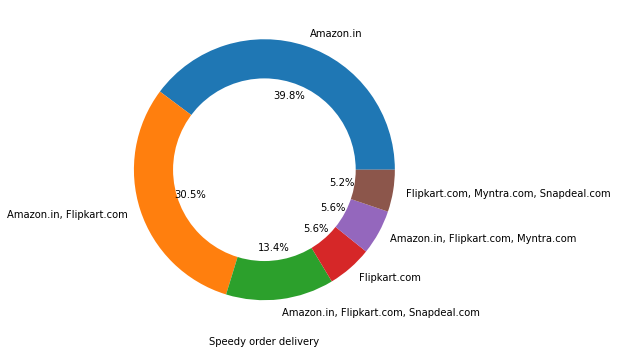

<Figure size 432x288 with 0 Axes>

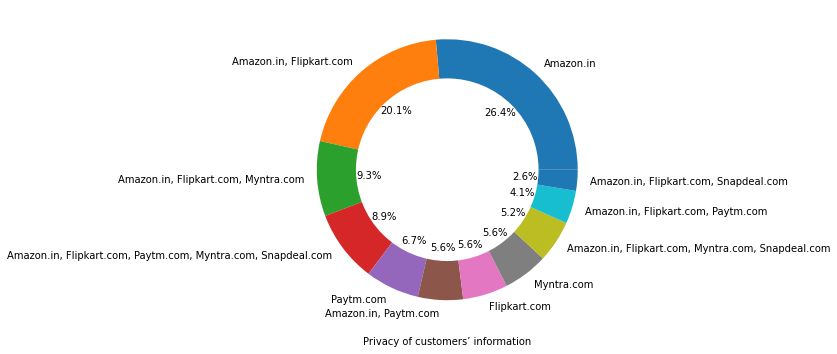

<Figure size 432x288 with 0 Axes>

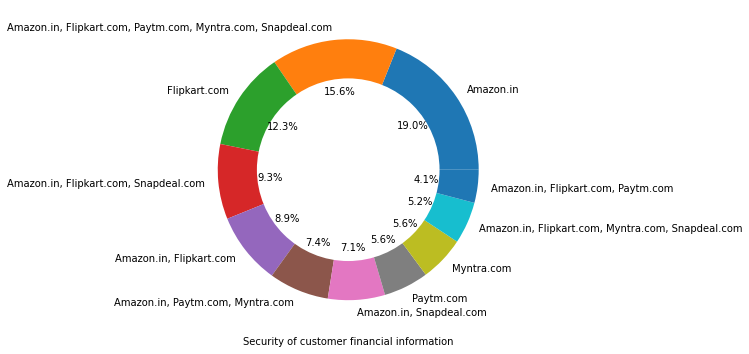

<Figure size 432x288 with 0 Axes>

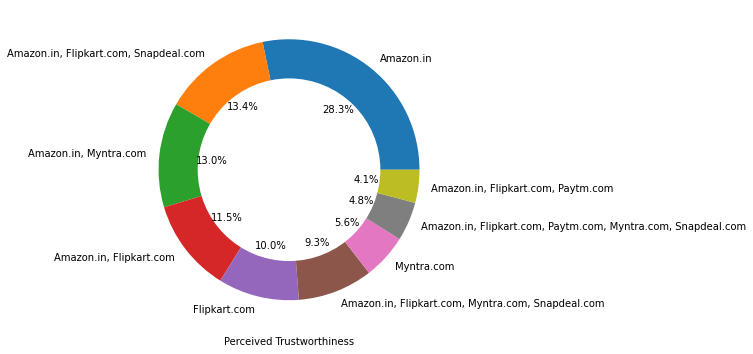

<Figure size 432x288 with 0 Axes>

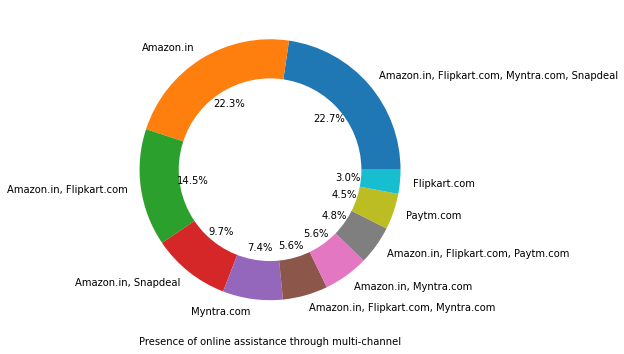

<Figure size 432x288 with 0 Axes>

In [28]:
for i in performance:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Amazon, Flipkart have been had the highest votes for having all the positive points and have maintained a very good brand image followed by paytm and the myntra.

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

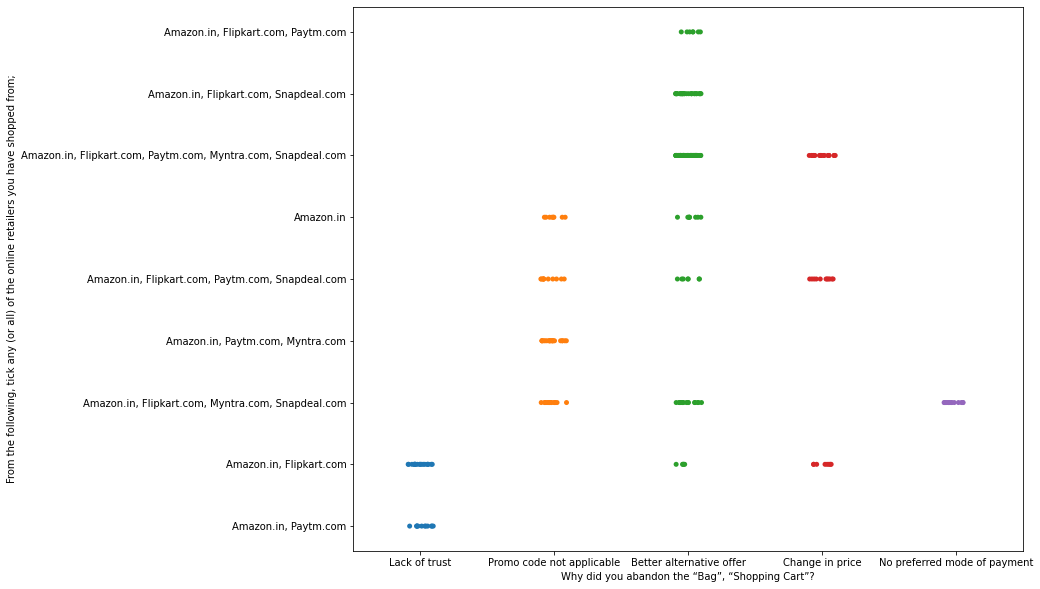

In [29]:
plt.figure(figsize=(12,10))
sns.stripplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

We can clearly see that most of the time people abandon the bag is beacuse they get a better alternative offer or promo code not applicable. There is also lack of trust seen in amazon, flipkart and paytm by some people.

Loyalty

Loyal customers are those who keep using the same brand even if it is not good as other brands

In [30]:
#Collecting all the negative remarks about a brand
bad=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']

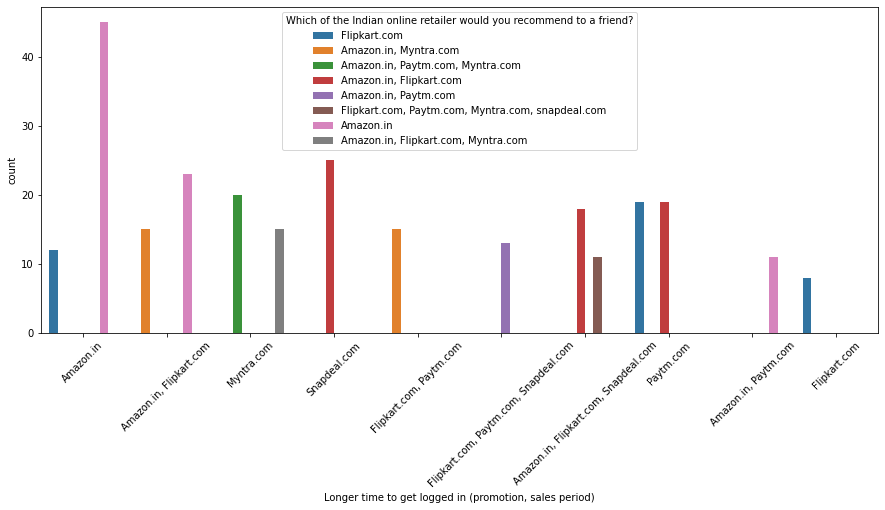

<Figure size 432x288 with 0 Axes>

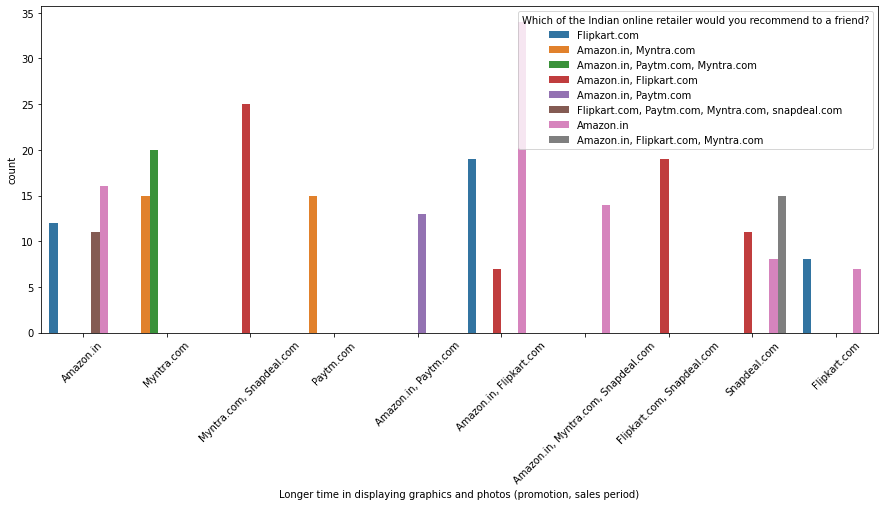

<Figure size 432x288 with 0 Axes>

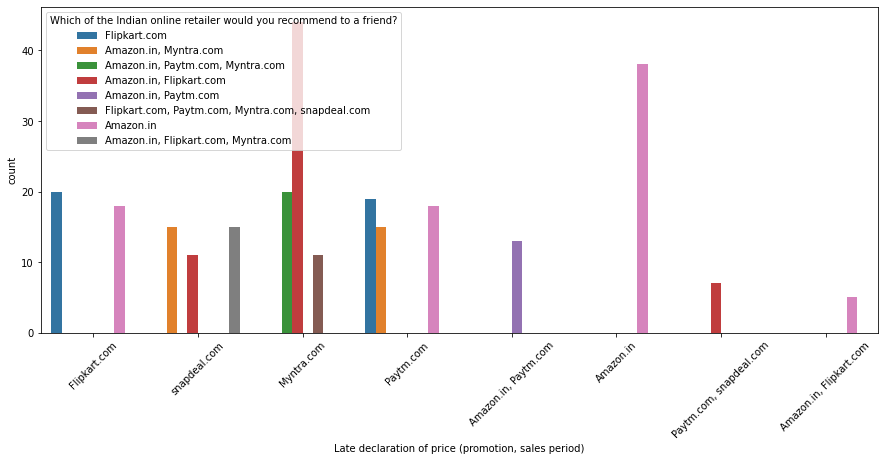

<Figure size 432x288 with 0 Axes>

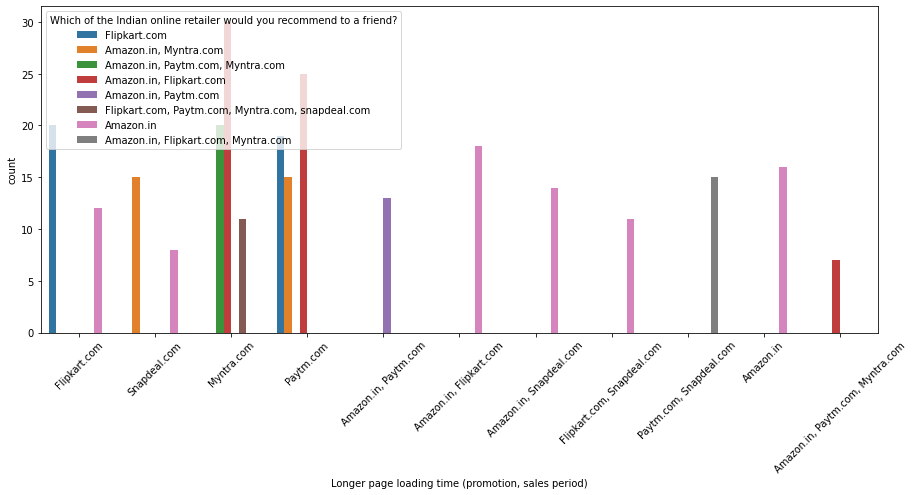

<Figure size 432x288 with 0 Axes>

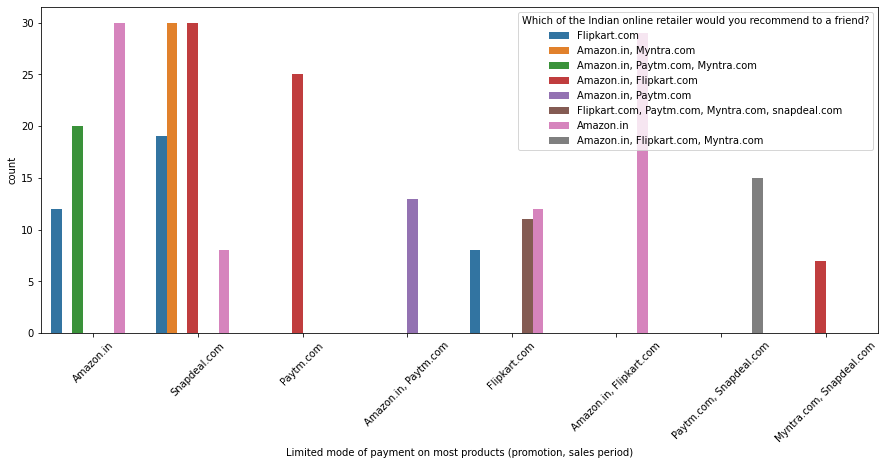

<Figure size 432x288 with 0 Axes>

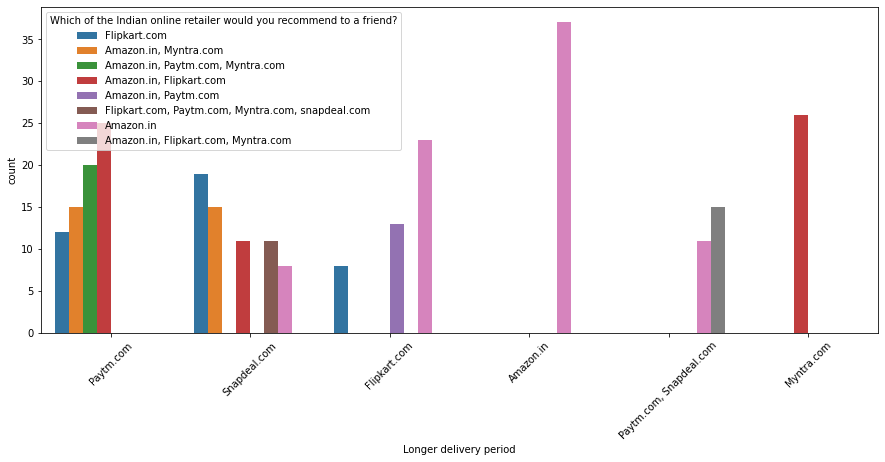

<Figure size 432x288 with 0 Axes>

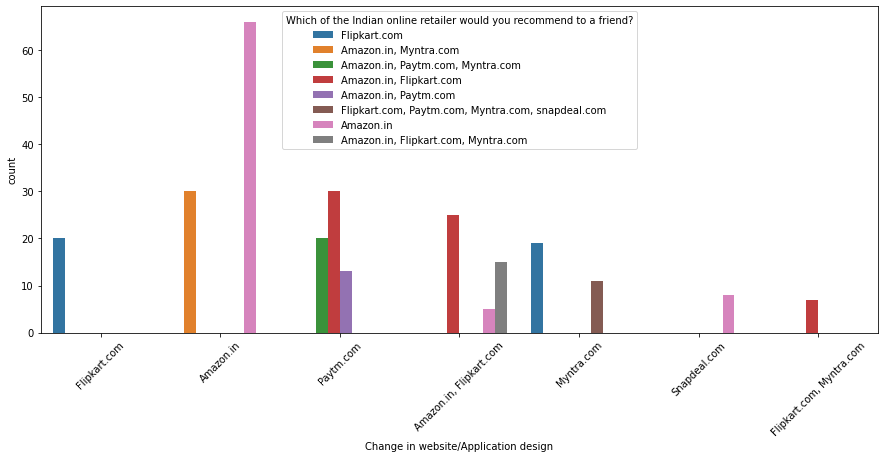

<Figure size 432x288 with 0 Axes>

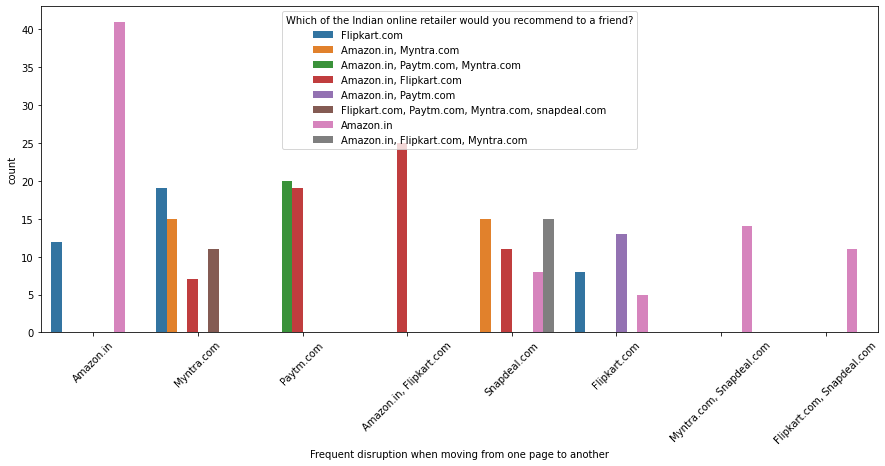

<Figure size 432x288 with 0 Axes>

In [31]:
for i in bad:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

Customers seem to be more loyal to amazon, flipkart and paytm as even though many of them have given negative remarks about them still they would recommend these platforms to their friend

Processing the dataframe

Separating the label from rest of the features

In [38]:
x=df.copy()
x.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1,inplace=True)
y=df['Which of the Indian online retailer would you recommend to a friend?']

Encoding Categorical Features


In [39]:
cat=[i for i in x.columns if x[i].dtypes=='O']

In [40]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encode=OrdinalEncoder()
labe=LabelEncoder()

In [41]:
#using ordinal encoder for independent features
for i in cat:
    x[i]=encode.fit_transform(x[i].values.reshape(-1,1))

#Using label encoder for Label Column
y=labe.fit_transform(y)

Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [43]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

Using various feature selection method to see which feature affects the most

Using Feature importance of random forrest

In [45]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(x,y)

RandomForestClassifier()

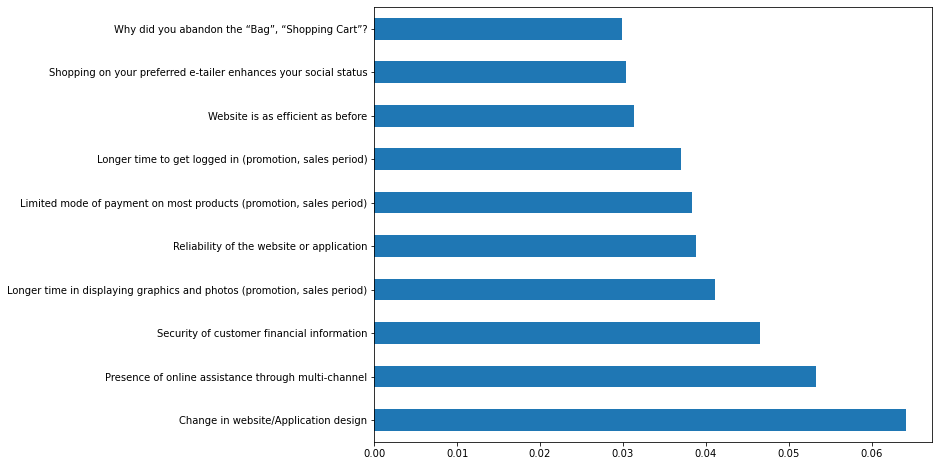

In [46]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(m.feature_importances_, index=x.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In the above chart we can see that above features are of most importance in determining whhich platform will a customer recommend to his friend.

Conclusion

The results of this study suggest following outputs which might be useful for E-commerce websites to extend their business
the cost of the product, the reliability of the E-commerce company and the return policies all play an equally important role in deciding the buying behaviour of online customers. The cost is an important factor as it was the basic criteria used by online retailers to attract customers. The reliability of the E-commerce company is also important, as it is even required in offline retail. It is important because customers are paying online, so they need to be sure of security of the online transaction. The return policies are important because in online retail customer does not get to feel the product. Thus, he wants to be sure that it will be possible to return the product if he does not like it in real. Whereas, the logistics factor, which included Cash on delivery option, One day delivery and the quality of packaging plays a secondary role in this process though these are Must-be-quality. This is so because these all does not interfere with the real product and people believe that this is the basic value that E-commerce websites provide.
All the websites were not equally preferred by online customers. Amazon was the most preferred followed by Flipkart. This can be explained easily by previous result that we got. These two companies are most trusted in the industry and hence, have a huge reliability. Also, the sellers listed on these websites are generally from Tier 1 cities as compared to Snapdeal and PayTM which have more sellers from tier 2 and 3 cities. Also, these websites have the most lenient return policies as compared to others and also the time required to process a return is low for these.